# Introduction to Scikit Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-learn library.

0. End-to-end scikit-learn workflow
1. Getting data ready
2. Choose the right estimator/algorithm for our problems.
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. putting it all together!

## 0. End-to-End scikit-learn workflow

In [66]:
#1. get data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv");

In [67]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
# Create X (features matrix)
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
x, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#Keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
#3. Fit model to data
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [71]:
clf.fit(x_train, y_train);

In [72]:
#make prediction 
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3


In [73]:
y_preds = clf.predict(x_test)

In [74]:
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
y_test

288    0
9      1
57     1
60     1
25     1
      ..
301    0
198    0
195    0
210    0
224    0
Name: target, Length: 61, dtype: int64

In [76]:
# 4. Evaluate the model
clf.score(x_train, y_train)

1.0

In [77]:
clf.score(x_test, y_test)

0.8688524590163934

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [79]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 4, 30]], dtype=int64)

In [80]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [81]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 85.25%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 88.52%

Trying model with 60 estimators...
Model accuracy on test set: 85.25%

Trying model with 70 estimators...
Model accuracy on test set: 85.25%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [82]:
# 6. Save a model and load it 
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [83]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

## 1. Getting data ready to be used with ML 

Three main things we have to do: 

    1. Split the data into features and labels ( usually `X` & `y`)
    2. Filling (and also imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values (also called feature encoding)

In [84]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
X = heart_disease.drop("target", axis =1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [86]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [87]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [89]:
X.shape

(303, 13)

In [90]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical 

In [91]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [92]:
len(car_sales)

1000

In [93]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [94]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [95]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [96]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [97]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [98]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [99]:
from sklearn.ensemble import RandomForestRegressor  # or whichever model you are using

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Define the model
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [100]:
model.score(X_test, y_test)

0.3235867221569877

In [101]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


### 1.2 What if there were missing values? 

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether. 

In [102]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [103]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [104]:
#Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [105]:
#Let's convert data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [106]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [107]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Filling missing data with Pandas

In [108]:
#Fill make column
car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Colour"].fillna("Colour", inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

car_sales_missing["Doors"].fillna(4, inplace=True)

C:\Users\shiti\AppData\Local\Temp\ipykernel_22436\2107545438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\shiti\AppData\Local\Temp\ipykernel_22436\2107545438.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [109]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [110]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace = True)

In [111]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [112]:
len(car_sales_missing)

950

In [113]:
#Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [114]:
#Let's convert data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [115]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values with Scikit-Learn

In [116]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing 

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [117]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [118]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    3
Doors       0
Price       0
dtype: int64

In [119]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [120]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer"]

#Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features), 
    ("door_imputer", door_imputer, door_feature), 
    ("num_features", num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Toyota', 'White', 4.0, 150043.0],
       ['Honda', 'Red', 4.0, 87899.0],
       ['Toyota', 'Blue', 3.0, 98763.2],
       ['BMW', 'Black', 5.0, 11179.0],
       ['Nissan', 'White', 4.0, 213095.0],
       ['Toyota', 'Green', 4.0, 98763.2],
       ['Honda', 'missing', 4.0, 98763.2],
       ['missing', 'White', 4.0, 31600.0]], dtype=object)

In [121]:
car_sales_filled = pd.DataFrame(filled_X, 
                               columns = ["Make", "Colour", "Doors", "Odometer"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,87899.0
2,Toyota,Blue,3.0,98763.2
3,BMW,Black,5.0,11179.0
4,Nissan,White,4.0,213095.0


In [122]:
car_sales_filled.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [123]:
#Let's convert data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X


<8x15 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [124]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming transformed_X and y are already defined
# Preprocess y to convert currency strings to floats
y = y.str.replace('[\$,]', '', regex=True).astype(float)

# Split the data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Define and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model score: {score:.4f}")


Model score: -116.2431


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\shiti\AppData\Local\Temp\ipykernel_22436\2313725029.py:7: SyntaxWarning: invalid escape sequence '\$'
  y = y.str.replace('[\$,]', '', regex=True).astype(float)


## 2. Choosing the right estimator for problem 
Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators 
* Classification problem - predciting a category (heart disease or not)
     * Sometimes you'll see `clf` (short for classifier) used as a classification estimator 
* Regression problem - predicting a number (selling price of car)

If you're working on a ml problem and looking to use SKlearn and not sure, look at map 
https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem 

Let's use california housing dataset

In [125]:
# Get california housing dataset 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [126]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])

In [127]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [128]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [129]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [130]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [187]:
# Import algorithm 
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

#Split into train and test_sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)


0.5758549611440127

What if `Ridge` didn't work or the score didn't fit our needs?


Well, we could always try a different model...

How bout we try an ensemble model (an ensemble is combination of smaller models to make better predictions than a single model)


In [188]:
# import randomForestregressor from ensemble module
from sklearn.ensemble import RandomForestRegressor 

# Setup random seed

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

#Split into train and test_sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classfication problem 

In [189]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
# Import the linear svc model 
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [191]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [192]:
# Import the linear svc model 
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

Tidbit : 

    1. If you have structured data, use ensemble methods
    2. If unstructured data, use deep learning or transfer learning 

## 3. Fit the model/algorithm on our data and use it to make predictions 

### 3.1 Fitting the model to the data

* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [193]:
# Import the linear svc model 
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
## Fit the model to the data ( training the ml model)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a Machine Learning model 

2 ways to make predictions: 
1. `predict()`
2. `predict_proba()`

In [194]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [195]:
# Use a trained model to make predictions 
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [196]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [197]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [198]:
# compare predictions to truth labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [199]:
clf.score(X_test, y_test)

0.8524590163934426

In [200]:
np.mean(y_preds==y_test) == clf.score(X_test, y_test)

True

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)*100

85.24590163934425

Make predictions with `predict_proba()`

In [202]:
clf.predict_proba(X)

array([[0.19, 0.81],
       [0.29, 0.71],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.11, 0.89],
       [0.26, 0.74],
       [0.03, 0.97],
       [0.32, 0.68],
       [0.08, 0.92],
       [0.14, 0.86],
       [0.05, 0.95],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.15, 0.85],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.06, 0.94],
       [0.46, 0.54],
       [0.11, 0.89],
       [0.21, 0.79],
       [0.22, 0.78],
       [0.02, 0.98],
       [0.06, 0.94],
       [0.17, 0.83],
       [0.33, 0.67],
       [0.29, 0.71],
       [0.09, 0.91],
       [0.1 , 0.9 ],
       [0.13, 0.87],
       [0.06, 0.94],
       [0.05, 0.95],
       [0.21, 0.79],
       [0.  , 1.  ],
       [0.47, 0.53],
       [0.13, 0.87],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.1 , 0.9 ],
       [0.03, 0.97],
       [0.05, 0.95],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.62, 0.38],
       [0.07, 0.93],
       [0.07, 0.93],
       [0.11, 0.89],
       [0.02, 0.98],
       [0.06,

In [203]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [204]:
# Let's predict () on the same data....
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [205]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [206]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models 

In [207]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create model instance 
model = RandomForestRegressor()

#Fit model 
model.fit(X_train, y_train)
#Make predictions 
y_preds = model.predict(X_test)

In [208]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [209]:
y_test[:10]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: target, dtype: float64

In [210]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [211]:
len(y_preds)

4128

In [212]:
len(y_test)

4128

In [213]:
# Compare predictions to truth 

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [214]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model 

There ways to evaluate Scikit-Learn models/estimattors: 
1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions

### 4.1 Evaulating a model with the `score` method

In [220]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create train/test
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create model instance 
clf = RandomForestClassifier(n_estimators=100)

#Fit model 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [221]:
clf.score(X_train, y_train)

1.0

In [222]:
clf.score(X_test, y_test)

0.8524590163934426

In [223]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

Let's use the `score()` method on regression 

In [232]:
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

#Create train/test
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create model instance 
clf = RandomForestRegressor(n_estimators=100)

#Fit model 
clf.fit(X_train, y_train)

RandomForestRegressor()

In [233]:
clf.score(X_test, y_test)

0.8065734772187598

In [234]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 4.2 Evaluating model using `scoring` parameter

In [235]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create train/test
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Create model instance 
clf = RandomForestClassifier(n_estimators=100)

#Fit model 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [236]:
clf.score(X_test, y_test)

0.8524590163934426

In [237]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [238]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Comparing two 
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Default scoring parameter of classifier = mean accuracy
clf.score()

In [239]:
#Scoring parameter set to None by default

cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classfication report

In [243]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [244]:
np.mean(cross_val_score)

0.8248087431693989

In [248]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}% ")

Heart Disease Classifier Cross-Validated Accuracy: 82.48% 


**Area under the reciever operating characteristic curve (AUR/ROC)** 

* Area under (AUC)
* ROC cureve

* ROC cureves are a comparison of a model's true positive versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [249]:
#Create X_test, ... 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [250]:
from sklearn.metrics import roc_curve


clf.fit(X_train, y_train)
# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [251]:
y_probs_positive = y_probs[: ,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [252]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

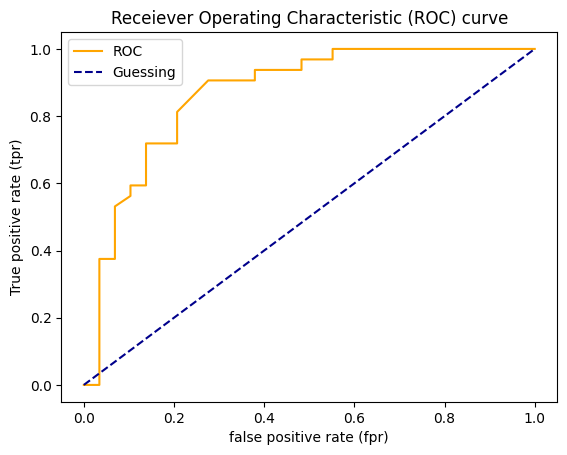

In [255]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """

    #Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    #Plot line with no predictive_power(baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle = "--", label="Guessing")

    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [256]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

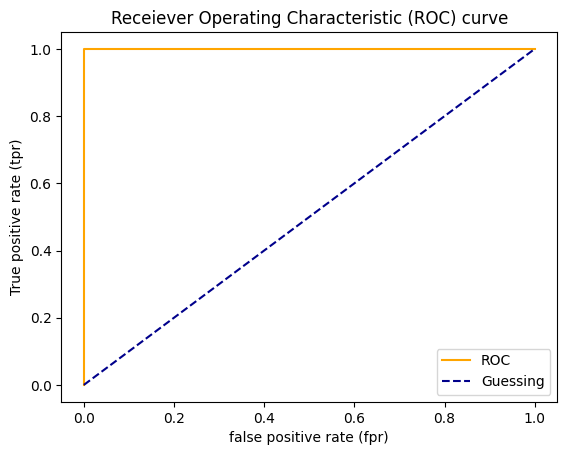

In [257]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [258]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**